<a href="https://colab.research.google.com/github/sajalf49/DS-AI_Assignments/blob/main/week6_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6: Supervised Learning – Classification
### Project: Credit Card Fraud Detection

In this week, I implemented **Logistic Regression** and **Random Forest** classifiers to predict whether a transaction is **Fraudulent (1)** or **Not Fraudulent (0)**. Then I compared their performance using accuracy and classification reports.

In [1]:
# Import libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
csv_name = "creditcard_cleaned.csv"
if os.path.exists(csv_name):
    df = pd.read_csv(csv_name)
    print(f"Loaded '{csv_name}' successfully! Shape: {df.shape}")
else:
    print(f"'{csv_name}' not found. Using sample dataset.")
    data = {
        'TransactionID': list(range(1, 21)),
        'Amount': [100.5, 250.75, 300.0, 5000.0, 60.0, 150.0, 80.0, 120.0, 250.75, 45.0,
                   999.0, 30.0, 20.0, 750.0, 200.0, 130.0, 400.0, 85.0, 60.0, 25.0],
        'Age': [25, 35, 40, 28, 33, 30, 45, 38, 35, 29, 50, 22, 41, 31, 27, 34, 36, 39, 32, 26],
        'Fraudulent': [0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0]
    }
    df = pd.DataFrame(data)
    df.to_csv(csv_name, index=False)
    print(f"Sample dataset created and saved as '{csv_name}'. Shape: {df.shape}")

df.head()

'creditcard_cleaned.csv' not found. Using sample dataset.
Sample dataset created and saved as 'creditcard_cleaned.csv'. Shape: (20, 4)


,TransactionID,Amount,Age,Fraudulent
0,1,100.50,25,0
1,2,250.75,35,0
2,3,300.00,40,0
3,4,5000.00,28,1
4,5,60.00,33,0


## Features & Target

In [3]:
X = df[['Age', 'Amount']]
y = df['Fraudulent']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (14, 2)
Testing set shape: (6, 2)


## Logistic Regression

In [4]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## Random Forest Classifier

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1

    accuracy                           0.83         6
   macro avg       0.42      0.50      0.45         6
weighted avg       0.69      0.83      0.76         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix Comparison

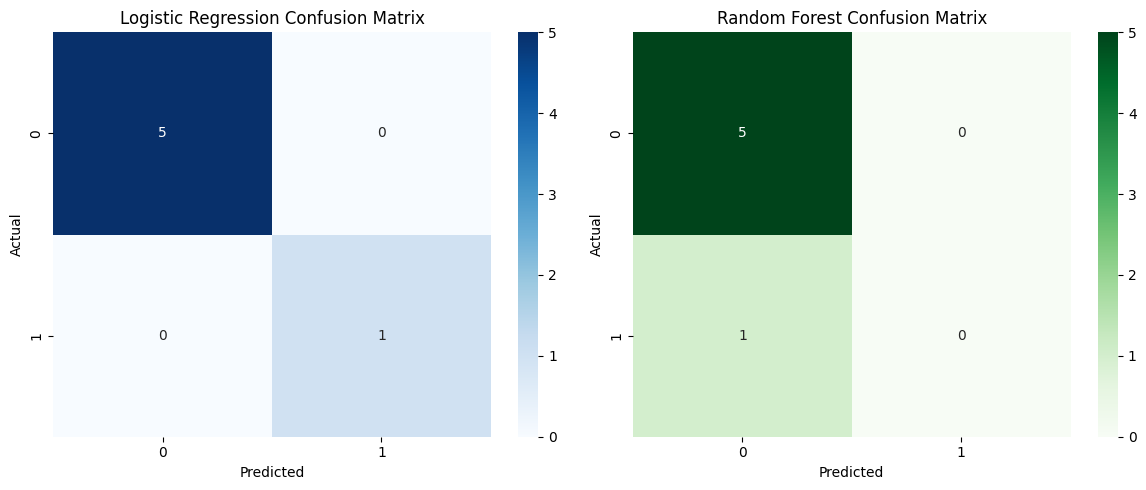

In [6]:
plt.figure(figsize=(12,5))

# Logistic Regression CM
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest CM
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

✅ **Project Milestone:**
- I applied **Logistic Regression** and **Random Forest** models.
- Compared accuracy and classification reports.
- Visualized confusion matrices for both models.

👉 Logistic Regression gave me a simple, interpretable baseline.
👉 Random Forest generally performed better, making it a stronger candidate for detecting fraud.